Link to colab:
https://colab.research.google.com/drive/1wYr9mRykawmX3Ppb4NYo6rOHeGb9hLoN?usp=sharing

Importing necessary libraries

In [368]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

Importing the give datasets

In [408]:
products = pd.read_csv("/content/products.tsv", sep="\t")
reviews = pd.read_csv("/content/reviews.tsv", sep="\t")

In [370]:
products.head()

,product_id,product_name,product_price,price_currency,product_availability,product_url,source_url
0,103205,"Hwipure, Disposable KF94 ( N95 / KN95/ FFP2 ) ...",2.95,AUD,http://schema.org/InStock,https://au.iherb.com/pr/Hwipure-Disposable-KF9...,https://au.iherb.com/c/protective-face-masks
1,101774,"HIGUARD, Disposable KF94 ( N95 / KN95/ FFP2 ) ...",2.95,AUD,http://schema.org/InStock,https://au.iherb.com/pr/HIGUARD-Disposable-KF9...,https://au.iherb.com/c/protective-face-masks
2,101955,"SunJoy, KN95, Professional Protective Disposab...",8.86,AUD,http://schema.org/InStock,https://au.iherb.com/pr/SunJoy-KN95-Profession...,https://au.iherb.com/c/protective-face-masks
3,103838,"Lozperi, Copper Mask, Adult, Black, 1 Mask",6.85,AUD,http://schema.org/InStock,https://au.iherb.com/pr/Lozperi-Copper-Mask-Ad...,https://au.iherb.com/c/protective-face-masks
4,102734,"Zidian, Disposable Protective Mask, 50 Pack",15.35,AUD,http://schema.org/InStock,https://au.iherb.com/pr/Zidian-Disposable-Prot...,https://au.iherb.com/c/protective-face-masks


In [376]:
products.isnull().sum()

product_id              0
product_name            0
product_price           0
price_currency          0
product_availability    0
product_url             0
source_url              0
dtype: int64

In [375]:
reviews.head()

,abuseCount,customerNickname,helpfulNo,helpfulYes,id,imagesCount,languageCode,postedDate,productId,profileInfo.ugcSummary.answerCount,profileInfo.ugcSummary.reviewCount,ratingValue,reviewText,reviewTitle,reviewed,score,languageCode.1,translation.reviewText,translation.reviewTitle
0,0,iHerb Customer,0,6,05c2b17e-c28d-4792-930d-27e787d8d4ad,1,en-US,2021-01-27T09:04:10.569Z,103839,0.0,34.0,50,The mask quality and the color is good. It fit...,Dotted Pattern Is Nice,True,1.614071e+09,en-US,NaN,NaN
1,0,iHerb Customer,0,0,80e44af8-2edf-4b81-a80a-7e7888d03cc0,0,ru-RU,2021-02-07T00:56:39.055Z,103839,0.0,37.0,50,Внуку очень понравилось. Удобная маска.,Прекрасно!,False,1.612659e+09,ru-RU,The grandson really liked it. Comfortable mask.,en-US
2,0,iHerb Customer,0,0,9a76e047-21e4-4da3-8b50-9d2396519b6b,0,en-US,2021-02-06T21:40:02.886Z,103839,0.0,3.0,40,Easy to put on & comfortable to wear.,Good,False,1.612648e+09,en-US,NaN,NaN
3,0,InnaIgorevna,0,0,2890ac54-8707-418e-be3e-8d46231e3672,0,ru-RU,2021-02-05T16:29:28.906Z,103839,0.0,16.0,40,"Тонкая, приятная к телу маска. Расцветка тоже ...",Хорошо,False,1.612543e+09,ru-RU,A thin mask that is pleasant to the body. I li...,en-US
4,0,iHerb Customer,0,0,9db33354-0457-4efa-bc9c-b5f7ee0eff31,0,ru-RU,2021-02-05T09:43:42.367Z,103839,0.0,19.0,50,Отличная маска! Мне подошла идеально. Слегка е...,Прекрасно!,False,1.612518e+09,ru-RU,Great mask! It suited me perfectly. There is a...,en-US


In [377]:
reviews.isnull().sum()

abuseCount                               0
customerNickname                         0
helpfulNo                                0
helpfulYes                               0
id                                       0
imagesCount                              0
languageCode                             0
postedDate                               0
productId                                0
profileInfo.ugcSummary.answerCount       6
profileInfo.ugcSummary.reviewCount       6
ratingValue                              0
reviewText                               0
reviewTitle                              0
reviewed                                 0
score                                    0
languageCode.1                           0
translation.reviewText                1855
translation.reviewTitle               1855
dtype: int64

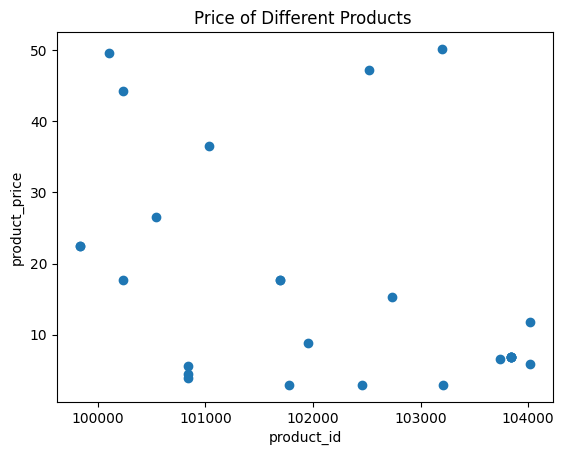

In [412]:
'''Distribution of price of products'''
plt.scatter(products["product_id"],products["product_price"])
plt.xlabel("product_id")
plt.ylabel("product_price")
plt.title("Price of Different Products ")
plt.show()

**Which products have the highest and lowest prices?**

In [410]:
for i in range(len(products["product_price"])):
  if products["product_price"][i] == max(products["product_price"]):
    print("Highest price = ",products["product_price"][i], " for " ,products["product_id"][i], ",", products["product_name"][i])
  elif products["product_price"][i] == min(products["product_price"]):
    print("Lowest price = ",products["product_price"][i]," for ",products["product_id"][i], ",", products["product_name"][i])

Lowest price =  2.95  for  103205 , Hwipure, Disposable KF94 ( N95 / KN95/ FFP2 ) Mask, 1 Mask
Lowest price =  2.95  for  101774 , HIGUARD, Disposable KF94 ( N95 / KN95/ FFP2 ) Mask, 1 Mask
Highest price =  50.19  for  103204 , Hwipure, Disposable KF94 ( N95 / KN95/ FFP2 ) Mask,  25 Masks
Lowest price =  2.95  for  102455 , Now Foods, Face Mask, Grey, S-M, 1 Mask


Importing the derived dataset of product names

In [373]:
productnames = pd.read_csv("/content/productnames.csv")

In [374]:
productnames.head()

,product_id,brand,mask_type,user,color,qty,pkg
0,102522,Dr. Puri,Disposable KF94 ( N95 / KN95/ FFP2 ) Mask,NaN,NaN,20,Pack
1,101774,HIGUARD,Disposable KF94 ( N95 / KN95/ FFP2 ) Mask,NaN,NaN,1,Mask
2,103205,Hwipure,Disposable KF94 ( N95 / KN95/ FFP2 ) Mask,NaN,NaN,1,Mask
3,103204,Hwipure,Disposable KF94 ( N95 / KN95/ FFP2 ) Mask,NaN,NaN,25,Pack
4,101692,Kitsch,100% Cotton Reusable Face Masks,Neutral,NaN,3,Pack


Combining the product and productnames dataset 

In [378]:
df1 = products.join(productnames.set_index('product_id'), on='product_id')
print(df1.shape)

(27, 13)


In [379]:
df1.head()

,product_id,product_name,product_price,price_currency,product_availability,product_url,source_url,brand,mask_type,user,color,qty,pkg
0,103205,"Hwipure, Disposable KF94 ( N95 / KN95/ FFP2 ) ...",2.95,AUD,http://schema.org/InStock,https://au.iherb.com/pr/Hwipure-Disposable-KF9...,https://au.iherb.com/c/protective-face-masks,Hwipure,Disposable KF94 ( N95 / KN95/ FFP2 ) Mask,NaN,NaN,1,Mask
1,101774,"HIGUARD, Disposable KF94 ( N95 / KN95/ FFP2 ) ...",2.95,AUD,http://schema.org/InStock,https://au.iherb.com/pr/HIGUARD-Disposable-KF9...,https://au.iherb.com/c/protective-face-masks,HIGUARD,Disposable KF94 ( N95 / KN95/ FFP2 ) Mask,NaN,NaN,1,Mask
2,101955,"SunJoy, KN95, Professional Protective Disposab...",8.86,AUD,http://schema.org/InStock,https://au.iherb.com/pr/SunJoy-KN95-Profession...,https://au.iherb.com/c/protective-face-masks,SunJoy,KN95 Professional Protective Disposable Face Mask,NaN,NaN,10,Pack
3,103838,"Lozperi, Copper Mask, Adult, Black, 1 Mask",6.85,AUD,http://schema.org/InStock,https://au.iherb.com/pr/Lozperi-Copper-Mask-Ad...,https://au.iherb.com/c/protective-face-masks,Lozperi,Copper Mask,Adult,Black,1,Mask
4,102734,"Zidian, Disposable Protective Mask, 50 Pack",15.35,AUD,http://schema.org/InStock,https://au.iherb.com/pr/Zidian-Disposable-Prot...,https://au.iherb.com/c/protective-face-masks,Zidian,Disposable Protective Mask,NaN,NaN,50,Pack


Combining the products and reviews dataset

In [380]:
df = reviews.join(df1.set_index('product_id'), on='productId')
print(df.shape)

(3849, 31)


In [381]:
df = df.drop(["price_currency","product_availability","product_url","source_url","languageCode.1"],axis=1)
print(df.shape)

(3849, 26)


Columns in the combined dataset

In [382]:
df.columns

Index(['abuseCount', 'customerNickname', 'helpfulNo', 'helpfulYes', 'id',
       'imagesCount', 'languageCode', 'postedDate', 'productId',
       'profileInfo.ugcSummary.answerCount',
       'profileInfo.ugcSummary.reviewCount', 'ratingValue', 'reviewText',
       'reviewTitle', 'reviewed', 'score', 'translation.reviewText',
       'translation.reviewTitle', 'product_name', 'product_price', 'brand',
       'mask_type', 'user', 'color', 'qty', 'pkg'],
      dtype='object')

In [383]:
'''Language of reviews'''
df["languageCode"].value_counts()

en-US    1855
ru-RU    1300
ar-SA     227
he-IL     167
ja-JP     121
fr-FR     102
zh-TW      19
ko-KR      19
es-MX      14
zh-CN      11
de-DE      11
pt-BR       3
Name: languageCode, dtype: int64

In [384]:
'''Number of products reviewed'''
df["reviewed"].value_counts()

False    2786
True     1063
Name: reviewed, dtype: int64

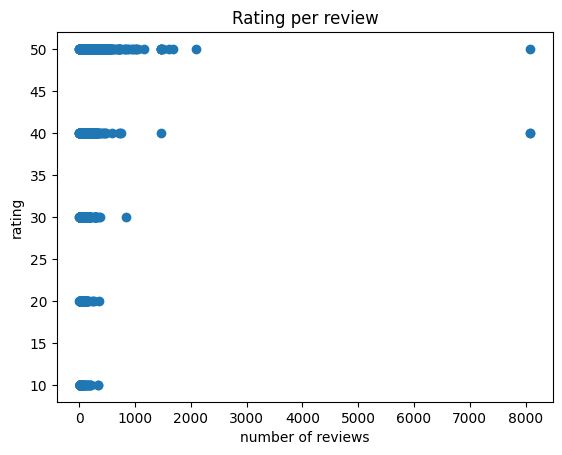

In [413]:
plt.scatter(df["profileInfo.ugcSummary.reviewCount"],df["ratingValue"])
plt.xlabel("number of reviews")
plt.ylabel("rating")
plt.title("Rating per review")
plt.show()

*What is score, is it useful?*

[1.61407105e+09 1.61265940e+09 1.61264760e+09 ... 1.59062001e+09
 1.59059226e+09 1.59052973e+09]
Range:  1589171798.984 , 1642403786.679
Count:  3765


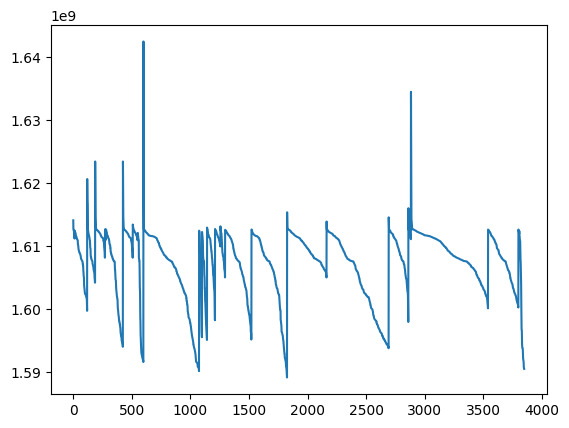

In [414]:
print(df["score"].unique())
min_score= min(df["score"])
max_score= max(df["score"])
print("Range: ",min_score,",",max_score)
print("Count: ",len(df["score"].unique()))
plt.plot(df["score"])
plt.show()

In [387]:
# for i in df.columns:
#     plt.figure()
#     plt.scatter(df[i],df["score"])
#     plt.ylabel("score")
#     plt.xlabel(i)
#     plt.show()

**Which is the most bought product?**

101955    658
100237    530
99830     475
102734    337
99829     304
101692    259
100837    225
101774    168
100541    145
103205    126
101691    107
102455     68
100840     68
100234     49
103743     46
101029     43
103838     42
103204     42
100099     41
102522     40
100839     25
103840     20
103839     12
103842      8
103841      7
104022      2
104023      2
Name: productId, dtype: int64

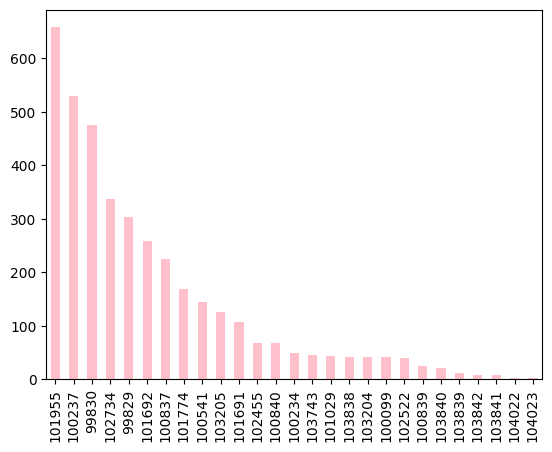

In [388]:
df['productId'].value_counts().plot(kind='bar',color='pink')
df['productId'].value_counts()

*Translating review text and removing the translated text field*

In [389]:
df['translation.reviewTitle'].value_counts()

en-US    1994
Name: translation.reviewTitle, dtype: int64

In [390]:
for i in range(len(df["productId"])):
  if df['translation.reviewTitle'][i] == "en-US":
    df['reviewText'][i] = df['translation.reviewText'][i]

df = df.drop(['translation.reviewText', 'translation.reviewTitle'],axis=1)

<ipython-input-390-b47fdb6179f2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviewText'][i] = df['translation.reviewText'][i]


In [391]:
df.tail(5)

,abuseCount,customerNickname,helpfulNo,helpfulYes,id,imagesCount,languageCode,postedDate,productId,profileInfo.ugcSummary.answerCount,...,reviewed,score,product_name,product_price,brand,mask_type,user,color,qty,pkg
3844,0,iHerb Customer,1,2,03b4c0ee-232c-413c-a793-36678b07fdc0,0,en-US,2020-05-26T19:05:21.892Z,100099,1.0,...,True,1.590909e+09,"Luseta Beauty, Disposable Protection Face Mask...",49.61,Luseta Beauty,Disposable Protection Face Mask,NaN,NaN,50,Pack
3845,0,iHerb Customer,0,0,b5f22161-4b73-4d6b-bf19-badde1682c8d,0,en-US,2020-05-29T16:52:35.709Z,100099,2.0,...,True,1.590771e+09,"Luseta Beauty, Disposable Protection Face Mask...",49.61,Luseta Beauty,Disposable Protection Face Mask,NaN,NaN,50,Pack
3846,0,iHerb Customer,0,0,fafdce53-c97c-4e01-9586-50895692468f,0,ja-JP,2020-05-27T22:53:33.674Z,100099,2.0,...,True,1.590620e+09,"Luseta Beauty, Disposable Protection Face Mask...",49.61,Luseta Beauty,Disposable Protection Face Mask,NaN,NaN,50,Pack
3847,0,iHerb Customer,0,1,de0471a2-9c82-429d-98d9-92ff3d5943f6,0,ko-KR,2020-05-23T03:11:01.259Z,100099,0.0,...,True,1.590592e+09,"Luseta Beauty, Disposable Protection Face Mask...",49.61,Luseta Beauty,Disposable Protection Face Mask,NaN,NaN,50,Pack
3848,0,iHerb Customer,0,0,66cb3271-f7a2-4b04-9874-b97a6393c7b6,0,en-US,2020-05-26T21:48:49.227Z,100099,0.0,...,True,1.590530e+09,"Luseta Beauty, Disposable Protection Face Mask...",49.61,Luseta Beauty,Disposable Protection Face Mask,NaN,NaN,50,Pack


**Given that the review is non english how many users find it helpful?**

In [392]:
yes_count, no_count = 0, 0
yes_count_eng, no_count_eng = 0, 0

for i in range(len(df["productId"])):
  if df['languageCode'][i] != "en-US":
    yes_count += df['helpfulYes'][i]
    no_count += df['helpfulNo'][i]
  else:
    yes_count_eng += df['helpfulYes'][i]
    no_count_eng += df['helpfulNo'][i]

print(yes_count, no_count)
print(yes_count_eng, no_count_eng)

1486 119
861 87


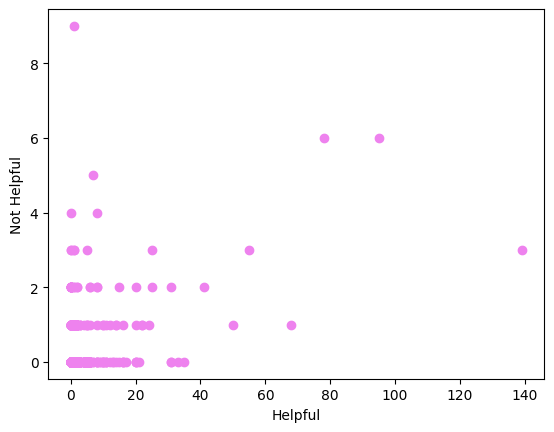

In [415]:
plt.scatter(df['helpfulYes'],df['helpfulNo'], color="violet")
plt.xlabel("Helpful")
plt.ylabel("Not Helpful")
plt.show()

**How many of total reviews are helpful or not?**

In [394]:
helpful = []
length = len(df["productId"])

In [395]:
for i in range(length):
  if df['helpfulYes'][i] > df['helpfulNo'][i]:
    helpful.append("Yes")
  elif (df['helpfulYes'][i] == df['helpfulNo'][i] != 0):
    helpful.append("Not really")
  else:
    helpful.append("No")
print("Yes: ",helpful.count("Yes"))
print("Not Really: ",helpful.count("Not Really"))
print("No: ",helpful.count("No"))

Yes:  642
Not Really:  0
No:  3193


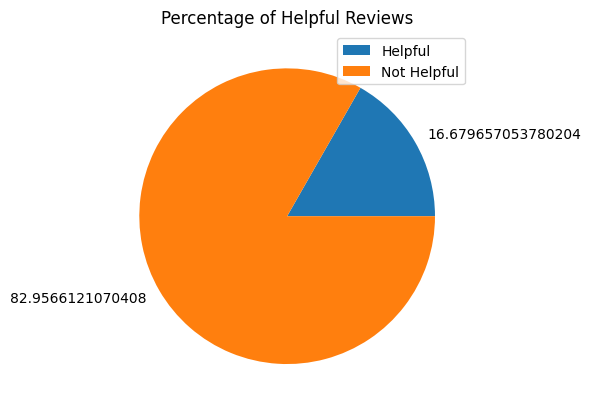

In [396]:
helpful_yes, helpful_no = helpful.count("Yes"),helpful.count("No")
plt.pie([helpful_yes/length, helpful_no/length], labels=[(helpful_yes/length)*100, (helpful_no/length)*100])
plt.legend(["Helpful","Not Helpful"],loc="upper right")
plt.title("Percentage of Helpful Reviews")
plt.show()

**Are reviews with images more helpful?**

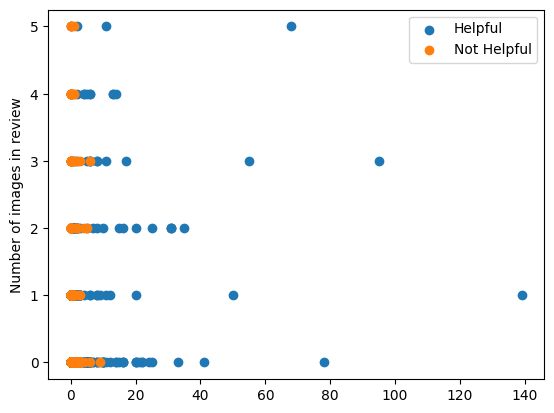

In [397]:
# Given that there was an image was the review helpful
plt.scatter(df["helpfulYes"],df["imagesCount"])
plt.scatter(df["helpfulNo"],df["imagesCount"])
plt.legend(["Helpful","Not Helpful"])
plt.ylabel("Number of images in review")
plt.show()

**Individual mask vs pack of mask which is more often purchased or profitable**

In [398]:
df['product_name'].value_counts()

SunJoy, KN95, Professional Protective Disposable Face Mask, 10 Pack            658
Kitsch, 100% Cotton Reuseable Face Masks, Leopard, 3 Pack                      530
Kosette, Nano Reusable Face Protection Mask, Medium, 1 Mask                    475
Zidian, Disposable Protective Mask, 50 Pack                                    337
Kosette, Nano Reusable Face Protection Mask, Large, 1 Mask                     304
Kitsch, 100% Cotton Reusable Face Masks, Neutral, 3 Pack                       259
La Hauteur, Disposable KF94 ( N95 / KN95/ FFP2 ) Mask, 1 Mask                  225
HIGUARD, Disposable KF94 ( N95 / KN95/ FFP2 ) Mask, 1 Mask                     168
Tony Moly, CTT KN95 Respirator Mask, 5 Count                                   145
Hwipure, Disposable KF94 ( N95 / KN95/ FFP2 ) Mask, 1 Mask                     126
Kitsch, 100% Cotton Reuseable Face Masks, Blush, 3 Pack                        107
Luseta Beauty, Disposable Protection Face Mask, 50 Pack                         90
Now 

In [399]:
# product = []
# price = []
# count = []
# for i in range(len(df['productId'])):
#   product.append(df['productId'][i])
#   price.append(df['product_price'][i])

# for i in product:
#   count.append(product.count(i))

# print(product)
# print(price)
# print(count)

In [407]:
p = {}
q = {}
c = {}
for i in set(df['productId']):
  for j in range(length):
    if i == df['productId'][j]:
      p[i] = df['product_price'][j]
      q[i] = df['qty'][j]
      break
print(p) #{product_id:product_price}
print(q) #{product_id:product_count}

for i in set(df['productId']):
  c[i] = 0
  for j in range(length):
    if i == df['productId'][j]:
      c[i] += 1
print(c) #{product_id:product_count}


{100099: 49.61, 100234: 44.31, 100237: 17.72, 101774: 2.95, 103838: 6.85, 103839: 6.85, 103840: 6.85, 103841: 6.85, 103842: 6.85, 103204: 50.19, 103205: 2.95, 101029: 36.54, 102455: 2.95, 101691: 17.72, 101692: 17.72, 100541: 26.57, 103743: 6.61, 101955: 8.86, 102734: 15.35, 104022: 11.81, 104023: 5.91, 100837: 5.61, 100839: 4.49, 100840: 3.93, 99829: 22.44, 99830: 22.44, 102522: 47.24}
{100099: 50, 100234: 50, 100237: 3, 101774: 1, 103838: 1, 103839: 1, 103840: 1, 103841: 1, 103842: 1, 103204: 25, 103205: 1, 101029: 50, 102455: 1, 101691: 3, 101692: 3, 100541: 5, 103743: 3, 101955: 10, 102734: 50, 104022: 3, 104023: 24, 100837: 1, 100839: 1, 100840: 1, 99829: 1, 99830: 1, 102522: 20}
{100099: 41, 100234: 49, 100237: 530, 101774: 168, 103838: 42, 103839: 12, 103840: 20, 103841: 7, 103842: 8, 103204: 42, 103205: 126, 101029: 43, 102455: 68, 101691: 107, 101692: 259, 100541: 145, 103743: 46, 101955: 658, 102734: 337, 104022: 2, 104023: 2, 100837: 225, 100839: 25, 100840: 68, 99829: 304, 

In [401]:
# df[['brand','maskType','category','color','package']] = df['product_name'].str.split(',', expand=True)

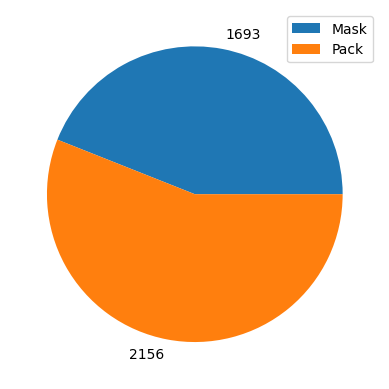

In [419]:
mask, pack = 0, 0
for i in range(length):
  if df['pkg'][i] == "Mask":
    mask += 1
  else:
    pack += 1
plt.pie([mask,pack],labels=[mask,pack])
plt.legend(["Mask","Pack"])
plt.show()

Packs are purchased more often.

In [423]:
price_per_mask = {}
for i in p.keys():
  price_per_mask[i] = p[i]/q[i]
print(price_per_mask)

{100099: 0.9922, 100234: 0.8862000000000001, 100237: 5.906666666666666, 101774: 2.95, 103838: 6.85, 103839: 6.85, 103840: 6.85, 103841: 6.85, 103842: 6.85, 103204: 2.0076, 103205: 2.95, 101029: 0.7308, 102455: 2.95, 101691: 5.906666666666666, 101692: 5.906666666666666, 100541: 5.314, 103743: 2.2033333333333336, 101955: 0.8859999999999999, 102734: 0.307, 104022: 3.936666666666667, 104023: 0.24625, 100837: 5.61, 100839: 4.49, 100840: 3.93, 99829: 22.44, 99830: 22.44, 102522: 2.362}


In [432]:
for i in price_per_mask.keys():
  if price_per_mask[i] == min(price_per_mask.values()):
    print("Product with minimum price per mask has id ",i," with price of ", price_per_mask[i], "AUD")
  elif price_per_mask[i] == max(price_per_mask.values()):
    print("Product with maximum price per mask has id ",i," with price of ", price_per_mask[i], "AUD")

Product with minimum price per mask has id  104023  with price of  0.24625 AUD
Product with maximum price per mask has id  99829  with price of  22.44 AUD
Product with maximum price per mask has id  99830  with price of  22.44 AUD


The most profitable product has the product id 104023

The most and least bought products are:

In [433]:
for i in c.keys():
  if c[i] == min(c.values()):
    print("Least bought product is ",i," with count of ", c[i])
  elif c[i] == max(c.values()):
    print("Most bought product is ",i," with count of ", c[i])

Most bought product is  101955  with count of  658
Least bought product is  104022  with count of  2
Least bought product is  104023  with count of  2


**Which is the most reviewed product?**

In [438]:
r = {}
for i in set(df['productId']):
  r[i] = 0
  for j in range(length):
    if (i == df['productId'][j]) and (df['reviewed'][j]==True):
      r[i] += 1
print(r) #{product_id:review_count}
print("Number of reviews: ",sum(r.values()))

{100099: 29, 100234: 30, 100237: 248, 101774: 28, 103838: 6, 103839: 1, 103840: 0, 103841: 0, 103842: 1, 103204: 6, 103205: 14, 101029: 24, 102455: 14, 101691: 33, 101692: 72, 100541: 70, 103743: 4, 101955: 95, 102734: 27, 104022: 1, 104023: 1, 100837: 72, 100839: 8, 100840: 15, 99829: 97, 99830: 160, 102522: 7}
Number of reviews:  1063


In [439]:
for i in r.keys():
  if r[i] == min(r.values()):
    print("Least reviewed product is ",i," with ", r[i], " reviews.")
  elif r[i] == max(r.values()):
    print("Most reviewed product is ",i," with ", r[i], " reviews.")

Most reviewed product is  100237  with  248  reviews.
Least reviewed product is  103840  with  0  reviews.
Least reviewed product is  103841  with  0  reviews.


#### To explore

1. why less number of negative reviews
2. how was the sales each month, and is there any difference in sales between the first and second wave
3. Has the forest fires of 2020 affected the sales
4. Country wise preference for product, does a particular product outstand others within a country(or language)

* find sentiment of each review, + or -